In [1]:
import numpy as np
import pandas as pd

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium

In [2]:
hospital = pd.read_csv('/kaggle/input/hospitals-count-in-india-statewise/Hospitals count in India - Statewise.csv')

In [3]:
hospital.head()

,States/UTs,Number of hospitals in public sector,Number of hospitals in private sector,Total number of hospitals (public+private)
0,Lakshadweep,9,4,13
1,Chandigarh,9,4,13
2,Dadra & N Haveli,12,6,18
3,Puducherry,14,6,20
4,Daman & Diu,5,21,26


In [4]:
# Renaming Columns
hospital.rename(columns={"States/UTs":"States",
                   "Number of hospitals in public sector": "Public",
                   "Number of hospitals in private sector": "Private",
                   "Total number of hospitals (public+private)":"Total"
                  }, inplace=True)

In [5]:
hospital['Total'] = pd.to_numeric(hospital['Total'], errors='coerce')
hospital['Public'] = pd.to_numeric(hospital['Public'], errors='coerce')
hospital['Private'] = pd.to_numeric(hospital['Private'], errors='coerce')

In [6]:
hospital.dropna(inplace=True)

In [7]:
hospital.head()

,States,Public,Private,Total
0,Lakshadweep,9.0,4.0,13.0
1,Chandigarh,9.0,4.0,13.0
2,Dadra & N Haveli,12.0,6.0,18.0
3,Puducherry,14.0,6.0,20.0
4,Daman & Diu,5.0,21.0,26.0


In [8]:
print('The dataset has {} rows and {} columns.'.format(len(hospital), len(hospital.columns)))

The dataset has 19 rows and 4 columns.


In [9]:
#quick look at our data types & null counts 

hospital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   States   19 non-null     object 
 1   Public   19 non-null     float64
 2   Private  19 non-null     float64
 3   Total    19 non-null     float64
dtypes: float64(3), object(1)
memory usage: 760.0+ bytes


In [10]:
# To better understand the numeric data, we want to use the .describe() method. 
# This gives us an understanding of the central tendencies of the data. 

hospital.describe()

,Public,Private,Total
count,19.000000,19.000000,19.000000
mean,106.894737,171.368421,191.947368
std,119.019557,439.347270,284.776028
min,5.000000,4.000000,13.000000
25%,22.000000,7.000000,31.000000
50%,43.000000,14.000000,65.000000
75%,156.500000,25.500000,180.500000
max,465.000000,1822.000000,971.000000


### Total number of hospital in every states/UTs

In [11]:
fig = px.bar(hospital, x='States', y='Total', title="Total number of hospital in all the states/UTs")
fig.show()

We can see that Madhya Pradesh, Andhra Pradesh and Chhattisgarh are the states contain high number of hospital.

### Private sector hospital in the states/UTs

In [12]:
fig = px.bar(hospital, x='States', y='Private', title="Private sector hospital in the states/UTs")
fig.show()

### Public sector hospital in the states/UTs

In [13]:
fig = px.bar(hospital, x='States', y='Public', title="Public sector hospital in the states/UTs")
fig.show()

In [14]:
print(hospital.groupby(["States"])[['Public', 'Private']].sum())

                         Public  Private
States                                  
Andaman Nicobar Islands    30.0      6.0
Andhra Pradesh            258.0    670.0
Arunachal Pradesh         218.0     20.0
Chandigarh                  9.0      4.0
Chhattisgarh              214.0   1822.0
Dadra & N Haveli           12.0      6.0
Daman & Diu                 5.0     21.0
Delhi                     109.0     67.0
Goa                        43.0     22.0
Jammu & Kashmir           143.0     14.0
Lakshadweep                 9.0      4.0
Madhya Pradesh            465.0    506.0
Manipur                    30.0      8.0
Meghalaya                 157.0     28.0
Mizoram                    90.0     23.0
Nagaland                   36.0     13.0
Puducherry                 14.0      6.0
Sikkim                     33.0      8.0
Tripura                   156.0      8.0


### The over view of the total private and public hospital in States.

In **Chhattisgarh**, **Andhra Pradesh**, **Madhya Pradesh** Private hospital is higher than Public hospital.
In **Arunachal Pradesh** ,**Tripura**, **Meghalaya** The Public hospital is higher than Private hospital. 

# Check the growth of public and private hospital

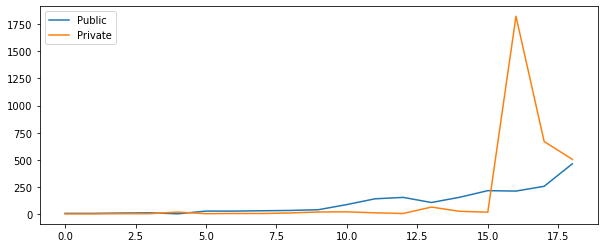

In [15]:
hospital.plot.line(y=['Public','Private'],figsize=(10,4))

Private Hospital has high growth than Public hospital.